In [61]:
import keras
from keras.api import layers
from keras.api.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [53]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"

INPUT_SHAPE = (50, 50)
CLASSES = 43

EPOCHS = 100

Loading Files and Dataset ...
Found Categories : ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 50, 50)
X-Test : (860, 50, 50)
Y-Train : (3439,)
Y-Test : (860,)


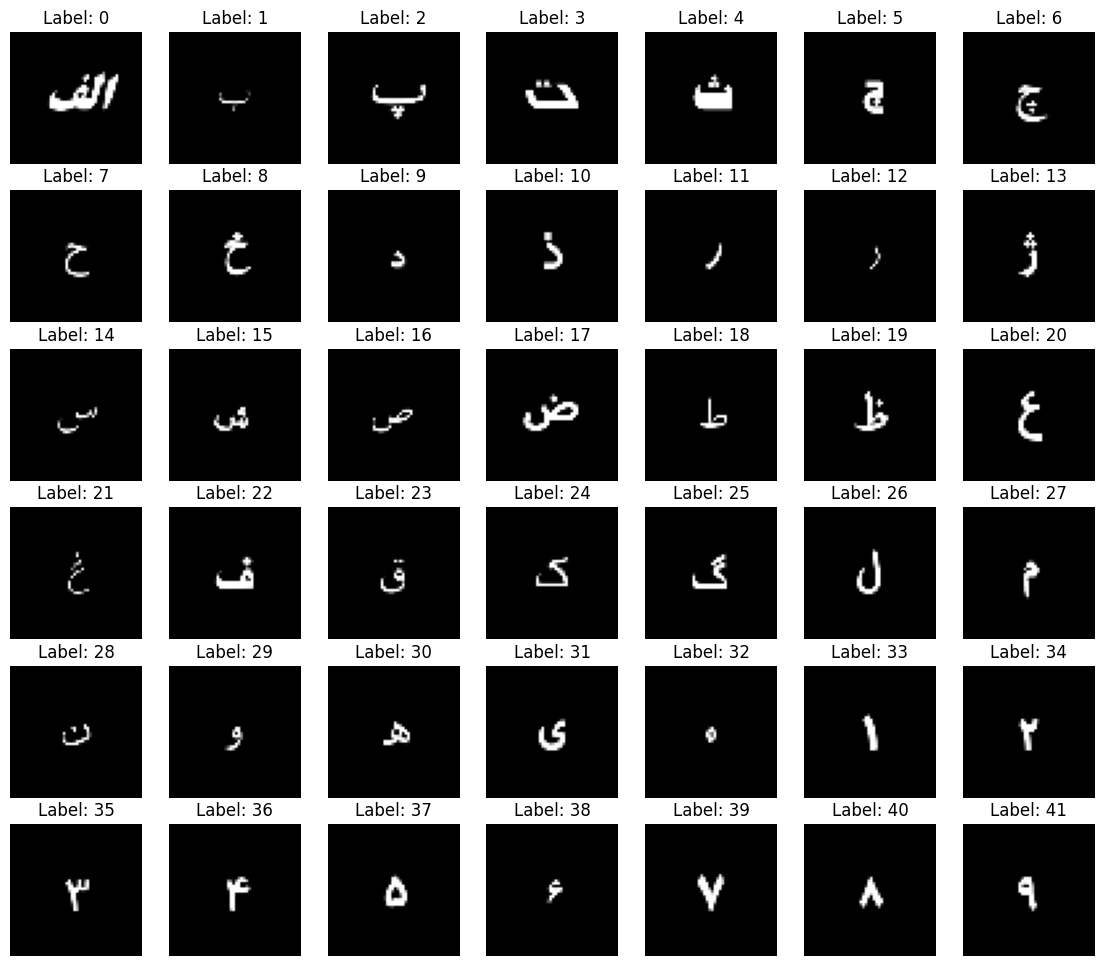

In [37]:
# (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# X_train = X_train.astype('float32') / 255.
# X_test = X_test.astype('float32') / 255.

# used=[]
# counter = 0
# i = 0
# plt.figure(figsize=(10, 4))
# while counter != 10:
#     while y_train[i] in used or y_train[i]!=counter:
#         i+=1
#         continue
#     used.append(y_train[i])
#     plt.subplot(2, 5, counter + 1)
#     plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
#     plt.title(f'Label: {y_train[i]}')
#     plt.axis('off')
#     counter+=1
# plt.show()

dataloader = DataLoader(path=DATASET1, image_size=INPUT_SHAPE[0], padding=0, invert=True)
X, y = dataloader.load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [56]:
model = Sequential(name='Model-1')

model.add(layers.Input(shape=INPUT_SHAPE))
model.add(layers.Flatten())
model.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
model.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
model.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
model.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
model.add(layers.Dense(units=128, activation='relu', use_bias=True, name='Dense_5'))
model.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_6'))
model.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_7'))

model.summary()

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     5,122,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_7 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,920,299 (30.21 MB)

 Trainable params: 7,920,299 (30.21 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test))

history_df = pd.DataFrame({
    'Epoch': range(1, len(history.history['accuracy']) + 1),
    'Training Accuracy': history.history['accuracy'],
    'Validation Accuracy': history.history['val_accuracy'],
    'Training Loss': history.history['loss'],
    'Validation Loss': history.history['val_loss']
})


display(history_df)

Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.0237 - loss: 3.7502 - val_accuracy: 0.0453 - val_loss: 3.4520
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.0636 - loss: 3.1781 - val_accuracy: 0.0814 - val_loss: 2.9190
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1103 - loss: 2.8271 - val_accuracy: 0.0988 - val_loss: 2.7641
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1142 - loss: 2.6768 - val_accuracy: 0.1105 - val_loss: 2.7195
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.1461 - loss: 2.5634 - val_accuracy: 0.1872 - val_loss: 2.5237
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.1870 - loss: 2.3863 - val_accuracy: 0.1733 - val_loss: 2.4054
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2114 - loss: 2.2764 - val_accuracy: 0.2453 - val_loss: 2.2000
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.2837 - loss: 2.0314 - 

,Epoch,Training Accuracy,Validation Accuracy,Training Loss,Validation Loss
0,1,0.031695,0.045349,3.688742,3.451961
1,2,0.072696,0.081395,3.075674,2.919034
2,3,0.112823,0.098837,2.802373,2.764145
3,4,0.122419,0.110465,2.652972,2.719527
4,5,0.148299,0.187209,2.546466,2.523671
...,...,...,...,...,...
95,96,0.943879,0.805814,0.159746,1.244676
96,97,0.961326,0.838372,0.115507,1.046441
97,98,0.960163,0.833721,0.110026,1.030172
98,99,0.972085,0.846512,0.083269,1.104908


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8516 - loss: 1.0719
Model 1 Test Accuracy: 0.8453
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


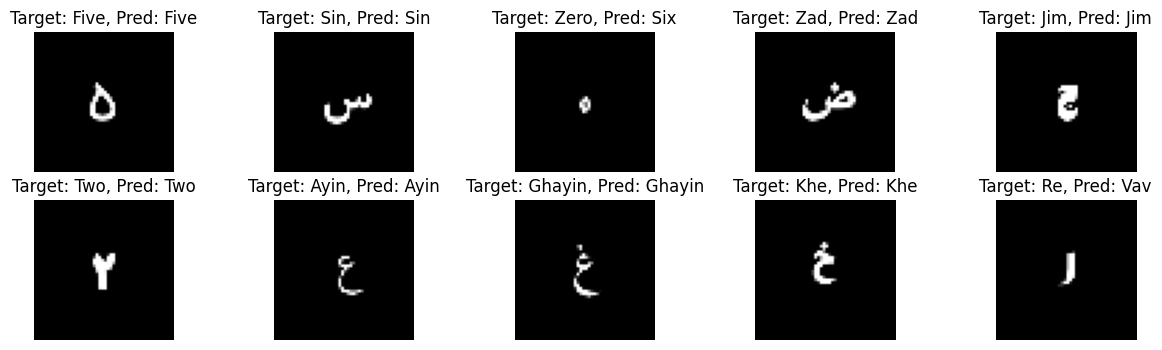

In [66]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Model 1 Test Accuracy: {test_acc:.4f}')

predictions = model.predict(X_test)

used=[]
counter = 0
i = 0
plt.figure(figsize=(15, 4))
while counter != 10:
    while y_test[i] in used:
        i+=1
        continue
    used.append(y_test[i])
    plt.subplot(2, 5, counter + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f'Target: {LABELS[y_test[i]]}, Pred: {LABELS[np.argmax(predictions[i])]}')
    plt.axis('off')
    counter+=1
plt.show()